# Python Implementation

Business case:- With the given features, we need to predict whether loan will be approved or not.

In [1]:
# Supervised learning with classification task

In [2]:
# import basic libraries
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [3]:
# Loading the data
data=pd.read_csv("Loan_Train.csv")

In [4]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [5]:
# Baisc checks
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [7]:
data.shape

(614, 13)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [9]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [10]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [11]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [12]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


# Exploratory data analysis

# Data preprocessing pipeline

In [13]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [14]:
data.loc[data['Gender'].isnull()==True]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
23,LP001050,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
126,LP001448,NaN,Yes,3+,Graduate,No,23803,0.0,370.0,360.0,1.0,Rural,Y
171,LP001585,NaN,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y
188,LP001644,NaN,Yes,0,Graduate,Yes,674,5296.0,168.0,360.0,1.0,Rural,Y
314,LP002024,NaN,Yes,0,Graduate,No,2473,1843.0,159.0,360.0,1.0,Rural,N
334,LP002103,NaN,Yes,1,Graduate,Yes,9833,1833.0,182.0,180.0,1.0,Urban,Y
460,LP002478,NaN,Yes,0,Graduate,Yes,2083,4083.0,160.0,360.0,NaN,Semiurban,Y
467,LP002501,NaN,Yes,0,Graduate,No,16692,0.0,110.0,360.0,1.0,Semiurban,Y
477,LP002530,NaN,Yes,2,Graduate,No,2873,1872.0,132.0,360.0,0.0,Semiurban,N
507,LP002625,NaN,No,0,Graduate,No,3583,0.0,96.0,360.0,1.0,Urban,N


In [15]:
data.Gender.value_counts()

Gender
Male      489
Female    112
Name: count, dtype: int64

In [16]:
data.loc[data['Gender'].isnull()==True,'Gender']='Male'

In [17]:
data.Gender.value_counts()

Gender
Male      502
Female    112
Name: count, dtype: int64

In [18]:
data.loc[data['Dependents'].isnull()==True,'Dependents']='0'

In [19]:
data.Dependents.value_counts()

Dependents
0     360
1     102
2     101
3+     51
Name: count, dtype: int64

In [20]:
data.Married.value_counts()

Married
Yes    398
No     213
Name: count, dtype: int64

In [21]:
data.loc[data['Self_Employed'].isnull()==True,'Self_Employed']='No'

In [22]:
data.Self_Employed.value_counts()

Self_Employed
No     532
Yes     82
Name: count, dtype: int64

In [23]:
data.Credit_History.value_counts()

Credit_History
1.0    475
0.0     89
Name: count, dtype: int64

In [24]:
data.loc[data['Credit_History'].isnull()==True,'Credit_History']=1.0

In [25]:
data.isnull().sum()

Loan_ID               0
Gender                0
Married               3
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [26]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


<Axes: >

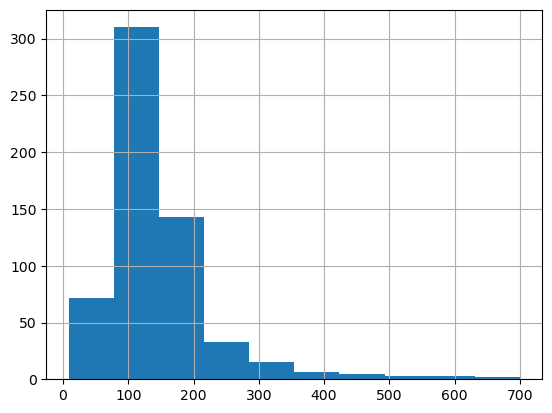

In [27]:
data.LoanAmount.hist()

In [32]:
np.median(data.LoanAmount.dropna(axis=0))

128.0

In [30]:
# Replace the nan values in LoanAmount column with median value
data.loc[data['LoanAmount'].isnull()==True,'LoanAmount']= np.median(data.LoanAmount.dropna(axis=0))

<Axes: >

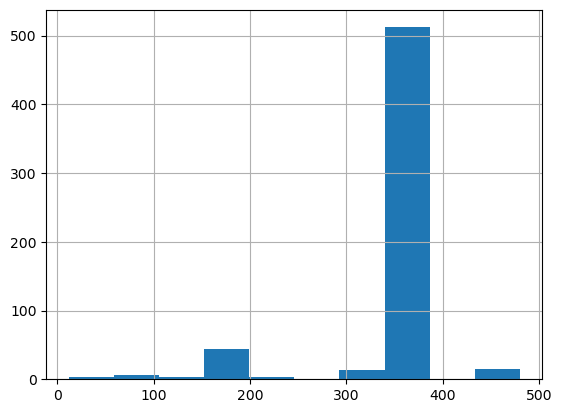

In [31]:
data.Loan_Amount_Term.hist()

In [33]:
data.loc[data['Loan_Amount_Term'].isnull()==True,'Loan_Amount_Term']= np.median(data.Loan_Amount_Term.dropna(axis=0))

In [34]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              3
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [35]:
data.rename(columns={"Loan_Status (Approved)":'Loan_Status'},inplace=True)

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [38]:
# Using Label encoder to convert the categorical data to numerical data

# Ordinal data

from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder()

data.Married=lc.fit_transform(data.Married)
data.Education=lc.fit_transform(data.Education)
data.Property_Area=lc.fit_transform(data.Property_Area)
data.Loan_Status=lc.fit_transform(data.Loan_Status)
data.Dependents=lc.fit_transform(data.Dependents)
data.Self_Employed=lc.fit_transform(data.Self_Employed)

In [39]:
# Nominal Data
data.Gender=pd.get_dummies(data.Gender,drop_first=True)

In [40]:
data.Gender

0       True
1       True
2       True
3       True
4       True
       ...  
609    False
610     True
611     True
612     True
613    False
Name: Gender, Length: 614, dtype: bool

In [41]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,True,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,LP001003,True,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,True,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,True,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,True,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,False,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,LP002979,True,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,LP002983,True,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,LP002984,True,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [45]:
# Scaling data
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
data[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']]=scale.fit_transform(data[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']])                                                                                                 

In [46]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,True,0,0,0,0,0.070489,0.000000,0.172214,0.74359,1.0,2,1
1,LP001003,True,1,1,0,0,0.054830,0.036192,0.172214,0.74359,1.0,0,0
2,LP001005,True,1,0,0,1,0.035250,0.000000,0.082489,0.74359,1.0,2,1
3,LP001006,True,1,0,1,0,0.030093,0.056592,0.160637,0.74359,1.0,2,1
4,LP001008,True,0,0,0,0,0.072356,0.000000,0.191027,0.74359,1.0,2,1


# Feature Selection

In [47]:
# checking correlation
corr_data=data[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']]

<Axes: >

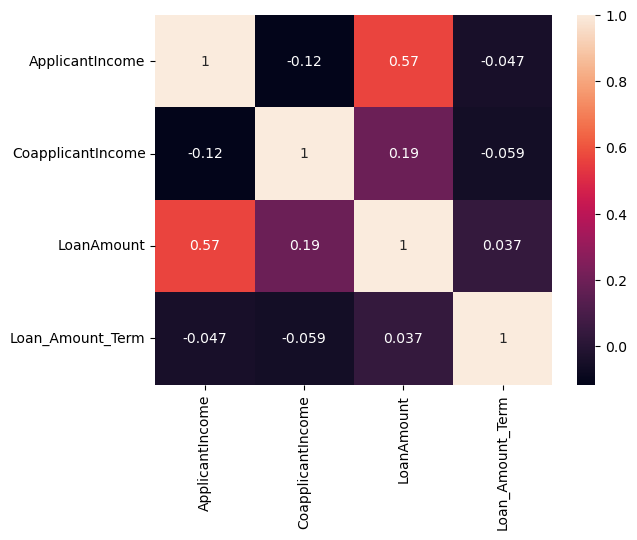

In [48]:
sns.heatmap(corr_data.corr(),annot=True)

In [49]:
# There is no relationship among the numerical features

In [52]:
corr_data.describe() ## No constant features

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
count,614.000000,614.000000,614.000000,614.000000
mean,0.064978,0.038910,0.197905,0.706005
std,0.075560,0.070229,0.121718,0.137668
min,0.000000,0.000000,0.000000,0.000000
25%,0.033735,0.000000,0.132055,0.743590
50%,0.045300,0.028524,0.172214,0.743590
75%,0.069821,0.055134,0.225398,0.743590
max,1.000000,1.000000,1.000000,1.000000


In [51]:
data.duplicated().sum()

0

# Model Creation

In [53]:
## defining X and y
x=data.iloc[:,1:-1]
y=data.Loan_Status

In [54]:
## creating training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x, y,random_state=3)

In [55]:
y.value_counts()

Loan_Status
1    422
0    192
Name: count, dtype: int64

In [56]:
## Balancing the data

# install imblearn package - pip install imblearn
from imblearn.over_sampling import SMOTE
smote = SMOTE()


In [57]:
x_smote, y_smote = smote.fit_resample(x_train,y_train)

In [59]:
from collections import Counter
print("Actual Classes",Counter(y_train))
print("SMOTE Classes",Counter(y_smote))

Actual Classes Counter({1: 301, 0: 159})
SMOTE Classes Counter({1: 301, 0: 301})


In [63]:
# Support Vector Classifier Model

from sklearn.svm import SVC
svclassifier = SVC() ## base model with default parameters
svclassifier.fit(x_smote, y_smote)

SVC()

In [64]:
# Predict output for X_test

y_hat=svclassifier.predict(x_test)

In [65]:
## evaluating the model creating
from sklearn.metrics import accuracy_score,classification_report,f1_score
acc=accuracy_score(y_test,y_hat)
acc

0.7142857142857143

In [66]:
# classification report measures the quality of predictions. True Positives, false positives, True negatives and false negatives
# are used to predict the metrics of a classification report

print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.39      0.61      0.48        33
           1       0.87      0.74      0.80       121

    accuracy                           0.71       154
   macro avg       0.63      0.67      0.64       154
weighted avg       0.77      0.71      0.73       154



In [67]:
cm1=pd.crosstab(y_test,y_hat)
cm1

col_0,0,1
Loan_Status,,
0,20,13
1,31,90


In [68]:
# F1 score considers both precision and recall for evaluating 0 model
f1=f1_score(y_test,y_hat)
f1

0.8035714285714286

In [70]:
## checking cross validation score
from sklearn.model_selection import cross_val_score

scores = cross_val_score(svclassifier,x,y,cv=3,scoring='f1')
print(scores)
print("Cross validation Score:",scores.mean())
print("Std :",scores.std())
#std of < 0.09 is good.

[0.87066246 0.86875    0.89032258]
Cross validation Score: 0.8765783470709949
Std : 0.0097499519233619


# what is a Model Hyperparameter?

A model hyperparameter is a configuration that is external to the model and whose value cannot be estimated from data.

# Hyperparameters of Support Vector Machine

SVM separates data points that belong to different classes with a decision boundary. When determining the decision boundary, a soft margin SVM (soft margin means allowing some data points to be misclassified) tries to solve an optimization problem with the following goals:

In [71]:
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}

grid = GridSearchCV(SVC(random_state=42), param_grid, verbose =3,scoring='f1',cv=3)

#fitting the model for grid search
grid.fit(x_smote, y_smote)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV 1/3] END ....................C=0.1, gamma=1;, score=0.721 total time=   0.0s
[CV 2/3] END ....................C=0.1, gamma=1;, score=0.670 total time=   0.0s
[CV 3/3] END ....................C=0.1, gamma=1;, score=0.629 total time=   0.0s
[CV 1/3] END ..................C=0.1, gamma=0.1;, score=0.710 total time=   0.0s
[CV 2/3] END ..................C=0.1, gamma=0.1;, score=0.738 total time=   0.0s
[CV 3/3] END ..................C=0.1, gamma=0.1;, score=0.733 total time=   0.0s
[CV 1/3] END .................C=0.1, gamma=0.01;, score=0.000 total time=   0.0s
[CV 2/3] END .................C=0.1, gamma=0.01;, score=0.664 total time=   0.0s
[CV 3/3] END .................C=0.1, gamma=0.01;, score=0.735 total time=   0.0s
[CV 1/3] END ................C=0.1, gamma=0.001;, score=0.000 total time=   0.0s
[CV 2/3] END ................C=0.1, gamma=0.001;, score=0.664 total time=   0.0s
[CV 3/3] END ................C=0.1, gamma=0.001;

GridSearchCV(cv=3, estimator=SVC(random_state=42),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             scoring='f1', verbose=3)

In [72]:
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}

grid = GridSearchCV(SVC(random_state=42), param_grid, verbose =1,scoring='f1',cv=3)

#fitting the model for grid search
grid.fit(x_smote, y_smote)

Fitting 3 folds for each of 25 candidates, totalling 75 fits


GridSearchCV(cv=3, estimator=SVC(random_state=42),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             scoring='f1', verbose=1)

In [73]:
# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 10, 'gamma': 0.01}
SVC(C=10, gamma=0.01, random_state=42)


In [75]:
# creating a model with optimal values
clf=SVC(C=10, gamma=0.001, random_state=42)

In [76]:
clf.fit(x_smote, y_smote)

SVC(C=10, gamma=0.001, random_state=42)

In [77]:
y_clf=clf.predict(x_test)

In [78]:
print(classification_report(y_test,y_clf))

              precision    recall  f1-score   support

           0       0.81      0.39      0.53        33
           1       0.86      0.98      0.91       121

    accuracy                           0.85       154
   macro avg       0.83      0.68      0.72       154
weighted avg       0.85      0.85      0.83       154



In [79]:
cm=pd.crosstab(y_test,y_clf)
cm

col_0,0,1
Loan_Status,,
0,13,20
1,3,118


In [80]:
f1=f1_score(y_test,y_clf)
f1

0.9111969111969112

In [81]:
scores_after = cross_val_score(clf,x,y,cv=3,scoring='f1')
print(scores_after)
print("Cross Validation Score:",scores_after.mean())
print("Std :",scores.std())
#std of < 0.05  is good.

[0.87066246 0.86875    0.81395349]
Cross Validation Score: 0.8511219829799721
Std : 0.0097499519233619
